In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Dataset/LIGOGravitySpyZooniverseProject.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/Whistle/L1_jbSGPY9SuI_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jbSGPY9SuI_spectrogram_2.0.png  
  inflating: train/train/Whistle/L1_jbSGPY9SuI_spectrogram_4.0.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_0.5.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_2.0.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_4.0.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_0.5.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_2.0.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_4.0.png  
  inflating: train/train/Whistle/L1_jxwh9gAJPg_spectrogram_0.5.png  
  inflating: train/train/Whistle/L1_jxwh9gAJPg_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jxwh9gAJPg_spect

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Import matplotlib.image as mpimg
import seaborn as sns
import random
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
train_dir = '/content/train/train'
test_dir = '/content/test/test'
validation_dir = '/content/validation/validation'

In [ ]:
import pandas as pd
df = pd.read_csv("/content/trainingset_v1d1_metadata.csv")
df.label.value_counts()

label
Blip                   1821
Koi_Fish                706
Low_Frequency_Burst     621
Light_Modulation        512
Power_Line              449
Extremely_Loud          447
Low_Frequency_Lines     447
Scattered_Light         443
Violin_Mode             412
Scratchy                337
1080Lines               328
Whistle                 299
Helix                   279
Repeating_Blips         263
No_Glitch               150
Tomte                   103
None_of_the_Above        81
1400Ripples              81
Chirp                    60
Air_Compressor           58
Wandering_Line           42
Paired_Doves             27
Name: count, dtype: int64

In [ ]:
classes_list = df.label.value_counts().index
classes_list = list(classes_list)

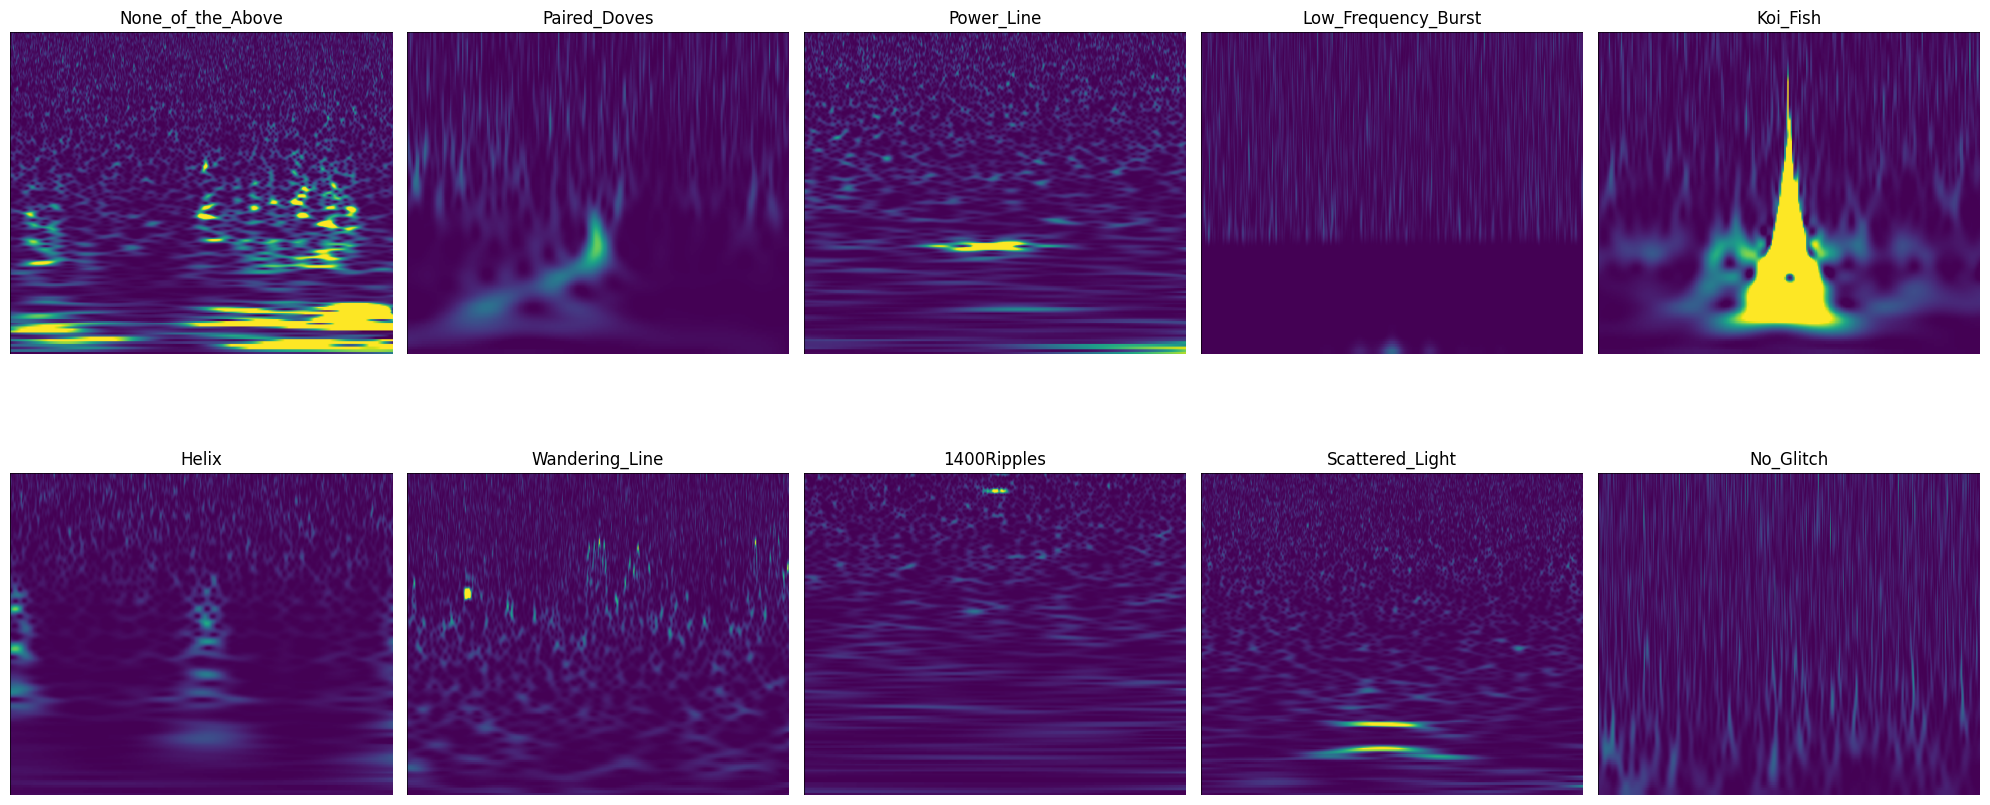

In [ ]:
train_dir = '/content/train/train'
plt.figure(figsize=(20, 10))

# Get the list of class names from the updated train_dir
class_names = os.listdir(train_dir)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    # Construct the full path to the image
    class_folder = os.path.join(train_dir, class_names[i])
    img_path = os.path.join(class_folder, os.listdir(class_folder)[0])
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(class_names[i])

plt.tight_layout()

In [ ]:
training_batch_size = 64
validation_batch_size = 32
img_dim = 250

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
validation_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  classes = classes_list,
  target_size = (img_dim, img_dim),
  batch_size = training_batch_size,
  class_mode = "categorical",
  shuffle = True,
  seed = 123)

Found 22348 images belonging to 22 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
  validation_dir,
  classes = classes_list,
  target_size = (img_dim, img_dim),
  batch_size = validation_batch_size,
  class_mode = "categorical",
  shuffle = True,
  seed = 123)

Found 4800 images belonging to 22 classes.


In [ ]:
test_size = !find '/content/test' -type f | wc -l
test_size = int(test_size[0])
test_batch_size = 1

In [ ]:
test_generator = test_datagen.flow_from_directory(
  test_dir,
  classes = classes_list,
  target_size = (img_dim, img_dim),
  batch_size = test_batch_size,
  class_mode = "categorical",
  shuffle = False)

Found 4720 images belonging to 22 classes.


In [ ]:
from tensorflow.keras.models import Sequential

input_shape = (img_dim, img_dim, 3)

model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (10, 10), input_shape=input_shape))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(32, (5, 5)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(img_dim, activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(22, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 241, 241, 32)   │         9,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 241, 241, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 116, 116, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 116, 116, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 58, 58, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 250)            │    12,544,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         5,522 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,603,532 (48.08 MB)

 Trainable params: 12,603,532 (48.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the CNN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Early Stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=12, verbose=1, mode='auto')

#Model Checkpoint
mc = ModelCheckpoint(monitor='val_accuracy', filepath="./bestmodel.keras",  verbose=1, save_best_only=True, mode='auto')

cd=[es,mc]

In [18]:
# Training the CNN on the Training set and evaluating it on the Validation set
his = model.fit(
    x=train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=cd,
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.6213 - loss: 0.1056
Epoch 1: val_accuracy improved from -inf to 0.93042, saving model to ./bestmodel.keras
350/350 ━━━━━━━━━━━━━━━━━━━━ 313s 838ms/step - accuracy: 0.6218 - loss: 0.1055 - val_accuracy: 0.9304 - val_loss: 0.0255
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.9352 - loss: 0.0214
Epoch 2: val_accuracy improved from 0.93042 to 0.94000, saving model to ./bestmodel.keras
350/350 ━━━━━━━━━━━━━━━━━━━━ 251s 717ms/step - accuracy: 0.9352 - loss: 0.0214 - val_accuracy: 0.9400 - val_loss: 0.0207
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9552 - loss: 0.0145
Epoch 3: val_accuracy improved from 0.94000 to 0.94458, saving model to ./bestmodel.keras
350/350 ━━━━━━━━━━━━━━━━━━━━ 245s 699ms/step - accuracy: 0.9552 - loss: 0.0145 - val_accuracy: 0.9446 - val_loss: 0.0174
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9661 - loss: 0.0111
Epoch 4: val_accur

Text(0.5, 1.0, 'Loss Evolution')

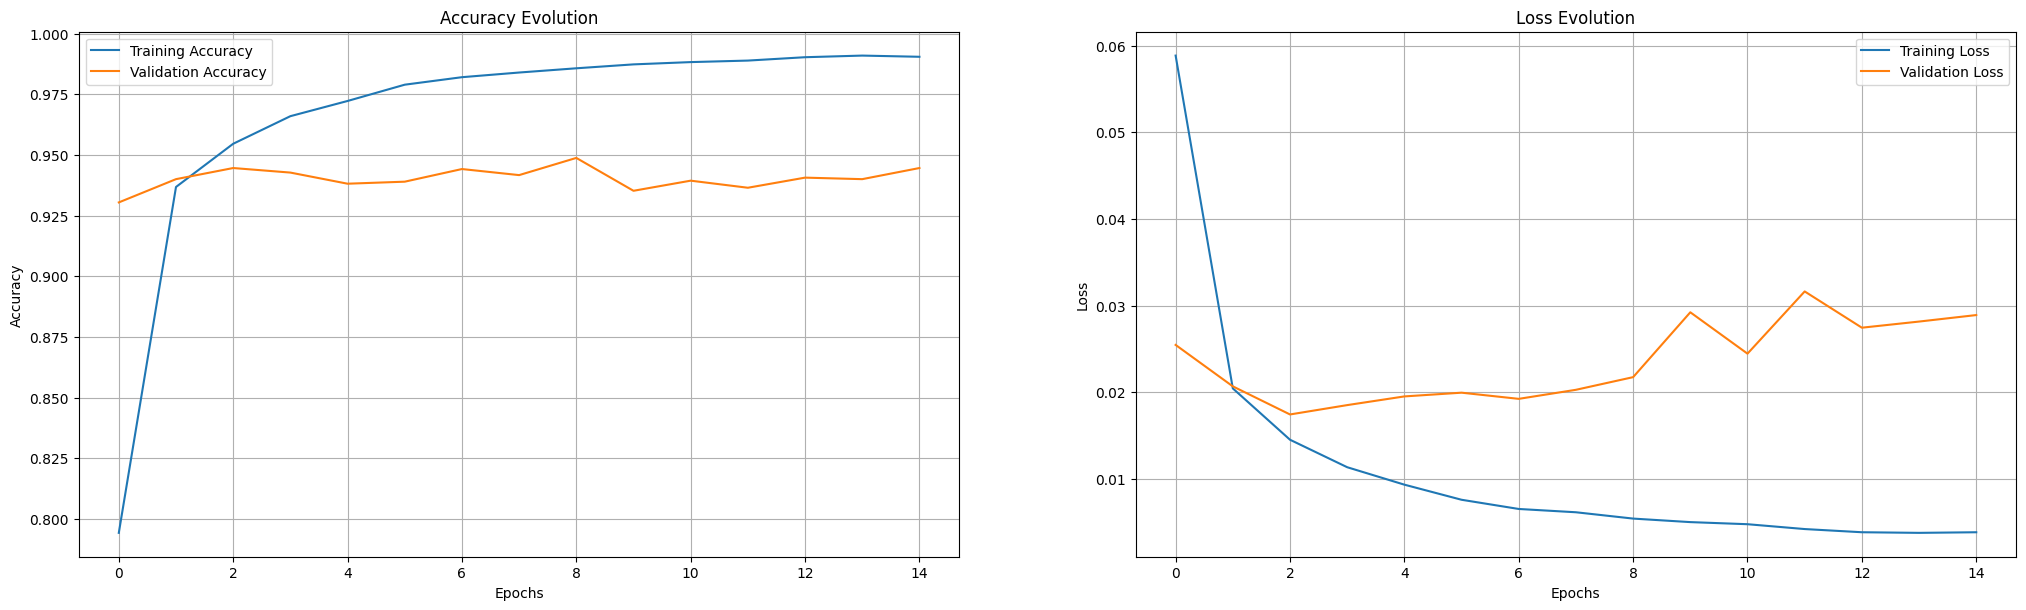

In [19]:
plt.figure(figsize=(25, 15))

#Model Accuracy
plt.subplot(2,2,1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( his.history["accuracy"], label = "Training Accuracy")
plt.plot( his.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.title('Accuracy Evolution')

#Model Loss
plt.subplot(2, 2, 2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(his.history['loss'], label='Training Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.grid(True)
plt.legend()
plt.title('Loss Evolution')

In [21]:
t = model.evaluate(train_generator)
v = model.evaluate(validation_generator)
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(t[1]*100,t[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(v[1]*100,v[0]))

350/350 ━━━━━━━━━━━━━━━━━━━━ 209s 588ms/step - accuracy: 0.9949 - loss: 0.0020
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 282ms/step - accuracy: 0.9427 - loss: 0.0286
Training Accuracy  : 99.50%     Training loss  : 0.002058
Validation Accuracy: 94.46%     Validation loss: 0.028897


In [27]:
Y_pred = model.predict(test_generator,steps=int(np.ceil(test_generator.n/test_batch_size)))
Y_pred = np.argmax(Y_pred, axis=1)
Y_ts = test_generator.classes

4720/4720 ━━━━━━━━━━━━━━━━━━━━ 54s 11ms/step


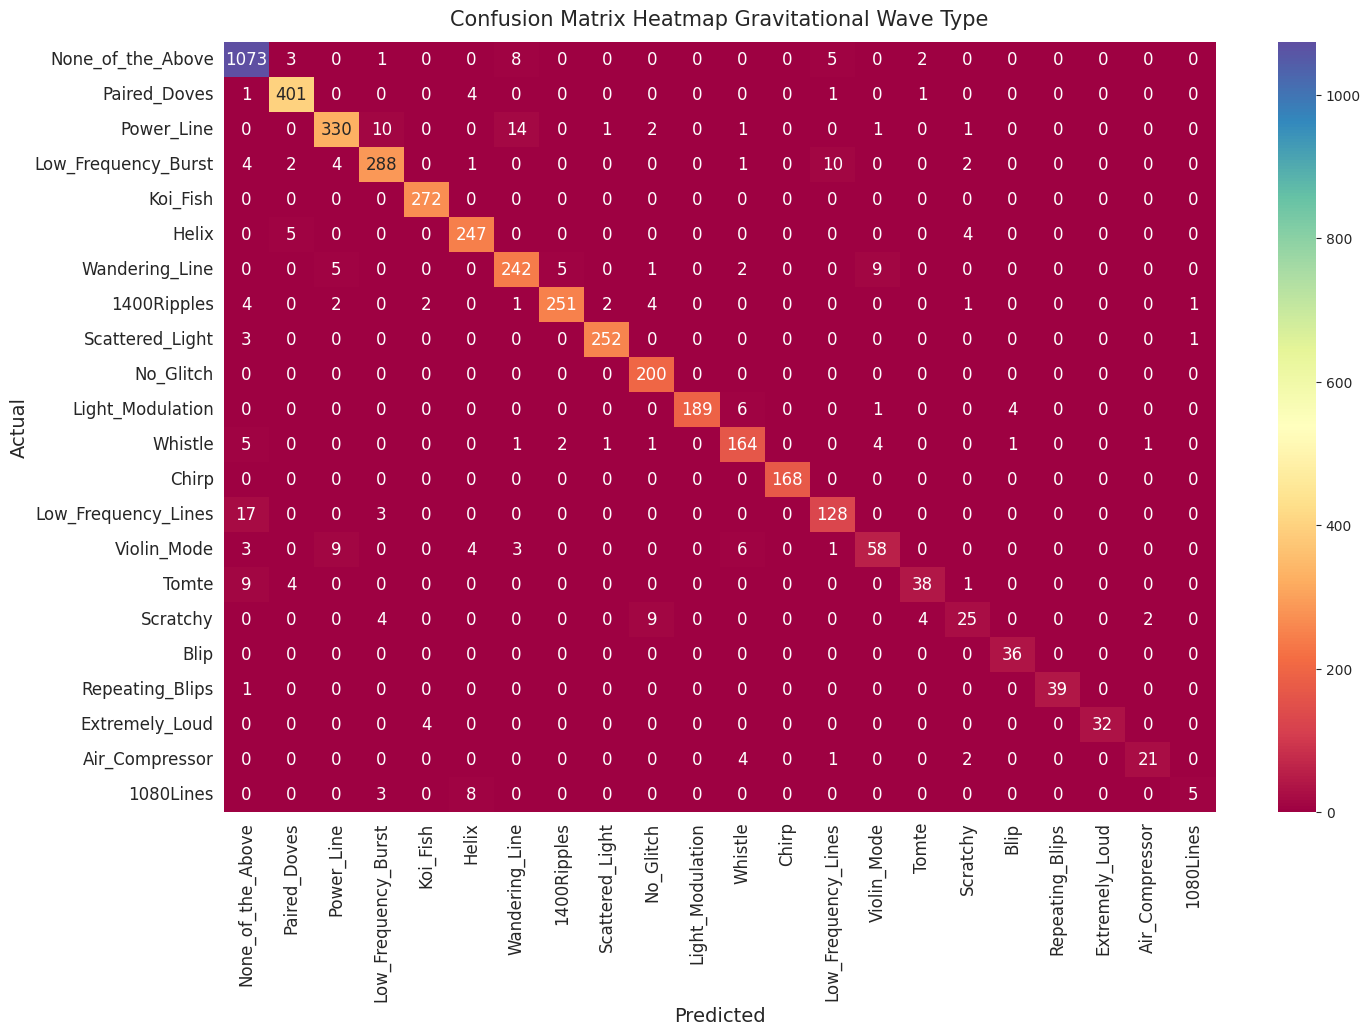

-Accuracy achieved: 94.47%
-Accuracy by model: 99.04%
-Accuracy by validation: 94.46%


In [28]:
conf_mat = confusion_matrix(Y_ts,Y_pred)
sns.set_style(style='white')
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":12},cmap='Spectral')
heatmap.set_title('Confusion Matrix Heatmap Gravitational Wave Type', fontdict={'fontsize':15}, pad=12)
heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
heatmap.set_xticklabels(class_names, fontdict={'fontsize':12,'rotation': 90})
heatmap.set_yticklabels(class_names, fontdict={'fontsize':12,'rotation': 0})
plt.show()

print('-Accuracy achieved: {:.2f}%\n-Accuracy by model: {:.2f}%\n-Accuracy by validation: {:.2f}%'.
      format(accuracy_score(Y_ts,Y_pred)*100,(his.history['accuracy'][-1])*100,(his.history['val_accuracy'][-1])*100))

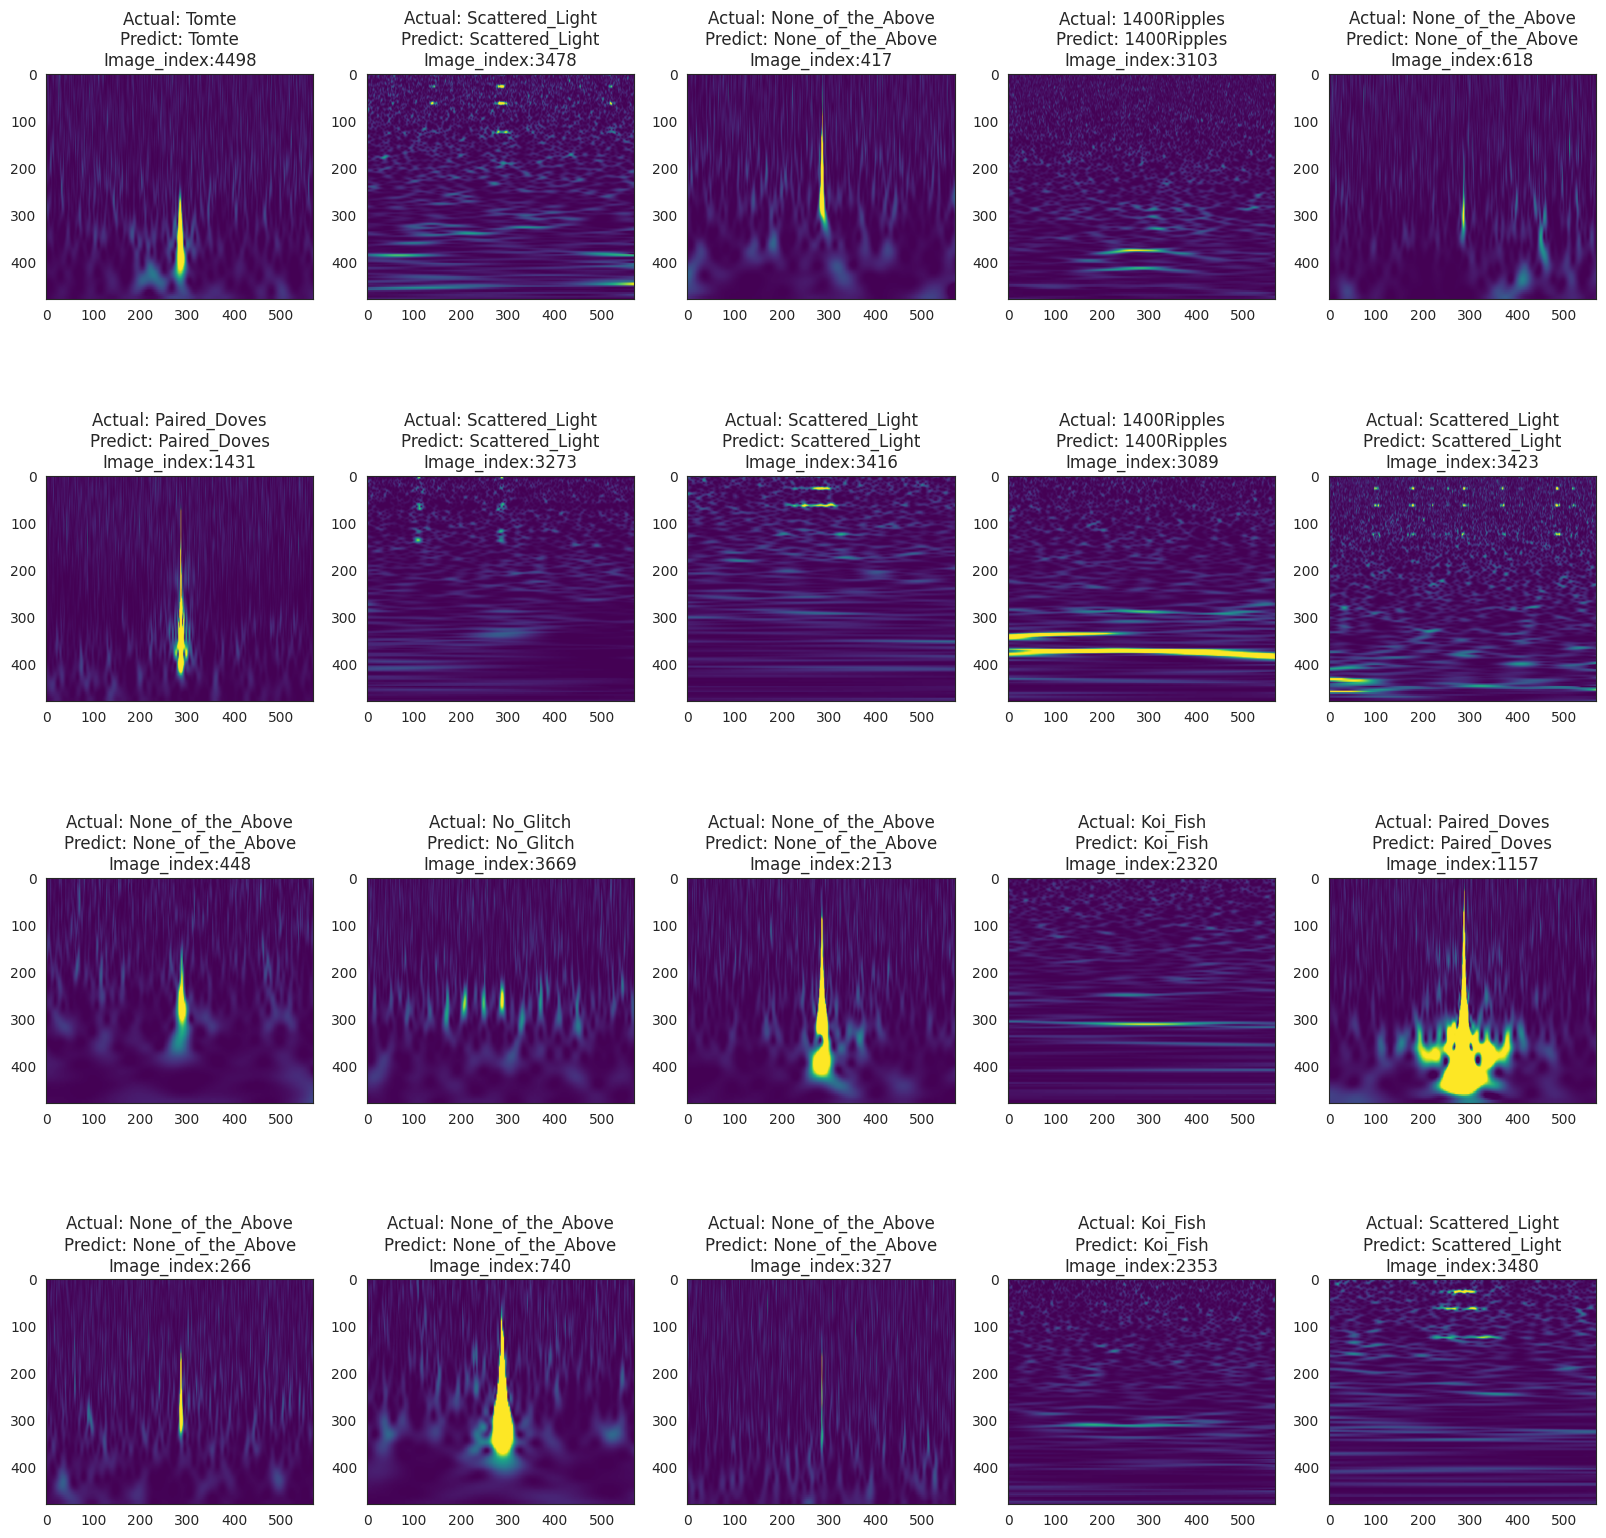

In [35]:
index=0
index_match= []

for label, predict in zip(Y_ts,Y_pred):
    if label == predict:
        index_match.append(index)
    index +=1

plt.figure(figsize=(20,20))

for i,img_index in zip(range(1,21),random.sample(index_match,k=20)):
    plt.subplot(4,5,i)
    img_read = plt.imread(test_generator.filepaths[img_index])
    plt.imshow(img_read)
    plt.title('Actual: '+str(class_names[Y_ts[img_index]])+'\nPredict: '+str(class_names[Y_pred[img_index]])+'\nImage_index:'+str(img_index))
plt.show()

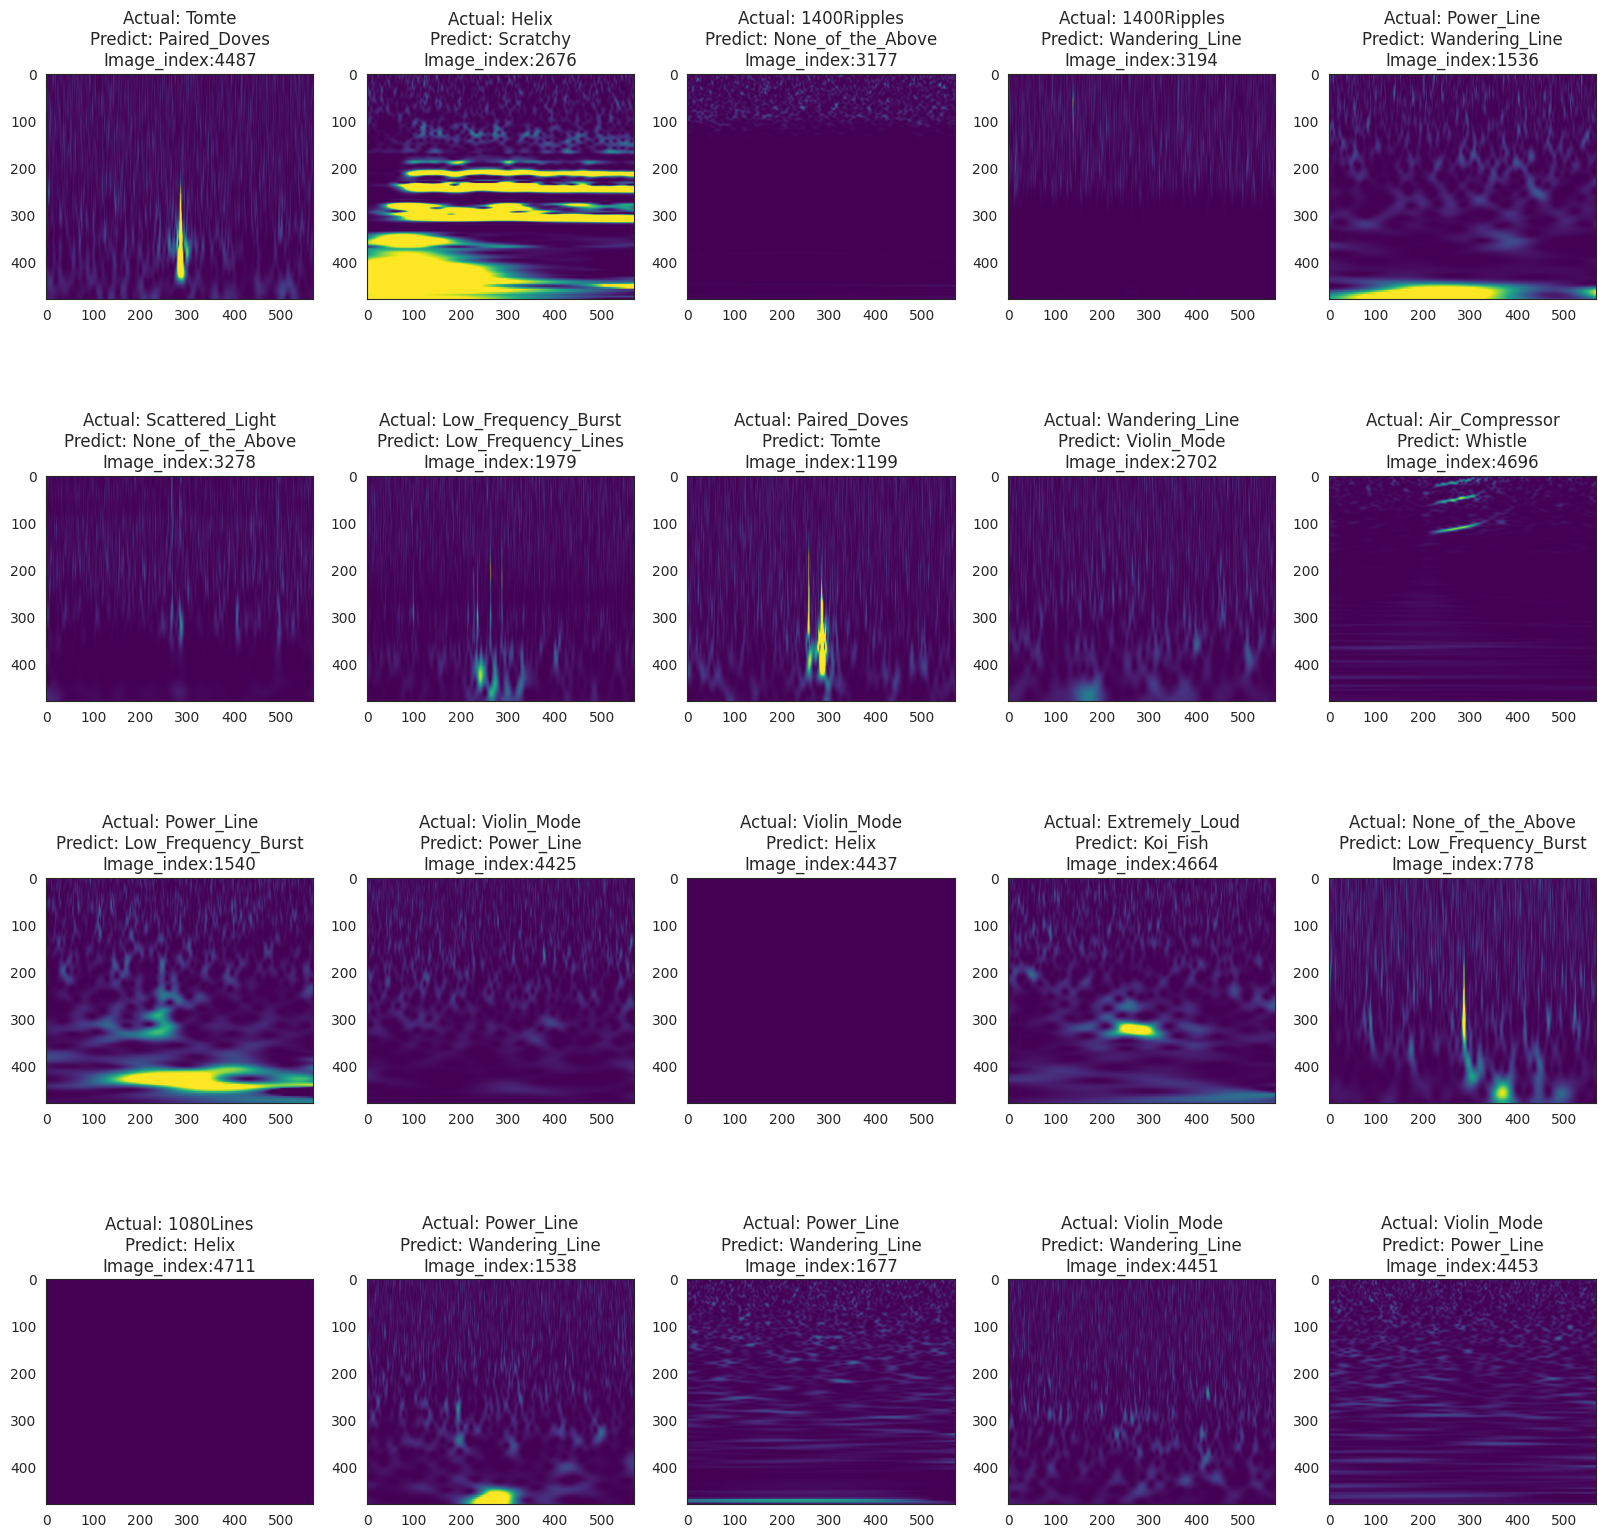

In [32]:
index=0
index_errors= []

for label, predict in zip(Y_ts,Y_pred):
    if label != predict:
        index_errors.append(index)
    index +=1

plt.figure(figsize=(20,20))

for i,img_index in zip(range(1,21),random.sample(index_errors,k=20)):
    plt.subplot(4,5,i)
    img_read = plt.imread(test_generator.filepaths[img_index])
    plt.imshow(img_read)
    plt.title('Actual: '+str(class_names[Y_ts[img_index]])+'\nPredict: '+str(class_names[Y_pred[img_index]])+'\nImage_index:'+str(img_index))
plt.show()